### Import Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import tensorflow as tf
from keras.layers import Activation, Dense

In [2]:
plt.style.use('dark_background')
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

## Generate Data

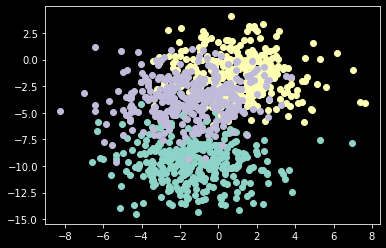

In [3]:
# generate 2d classification datasets
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
    
    # select indices of points with the class label
    row_ix = np.where(y == class_value)
    # scatter plot for points with a different color
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show plot
plt.show()

In [4]:
# one hot encode output variable
y = tf.keras.utils.to_categorical(y)

# split into train and test
n_train = 500

trainX, validX = X[:n_train, :], X[n_train:, :]
trainy, validy = y[:n_train], y[n_train:]

## Create Simple MLP Model

In [5]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, lrate):
    
    # define model
    model = tf.keras.Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = tf.keras.optimizers.SGD(learning_rate=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lrate='+str(lrate))
    plt.legend()

## Apply Learning Rate

In [6]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0

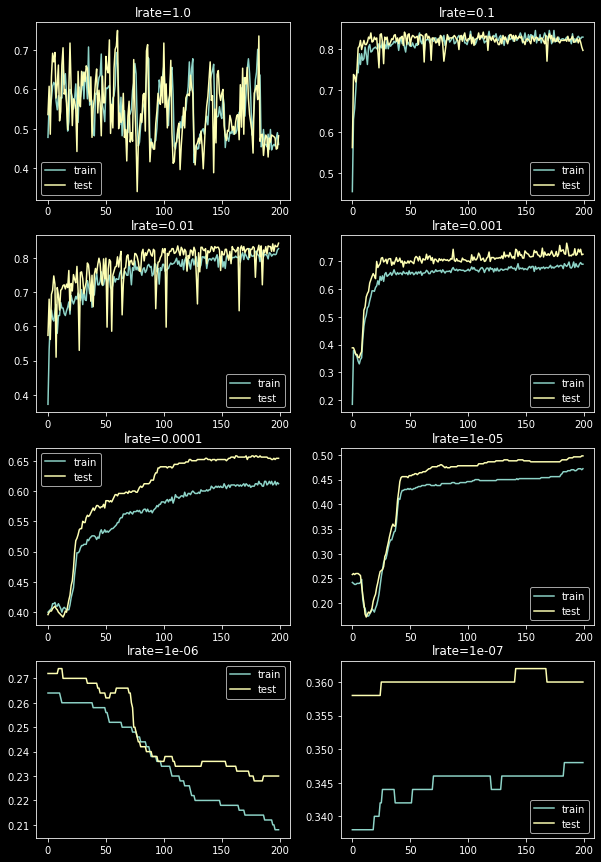

In [7]:
plt.figure(figsize=(10, 15))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(trainX, trainy, validX, validy, learning_rates[i])

# show learning curves
plt.show()

## Apply Momentum (lr=0.01)

In [16]:
# fit a model and plot learning curve
def fit_model_with_momentum(trainX, trainy, validX, validy, momentum):
    
    # define model
    model = tf.keras.Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('momentum='+str(momentum))
    plt.legend()

In [17]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.8, 0.9, 0.99, 1.0] # use momentum values close to 1.0

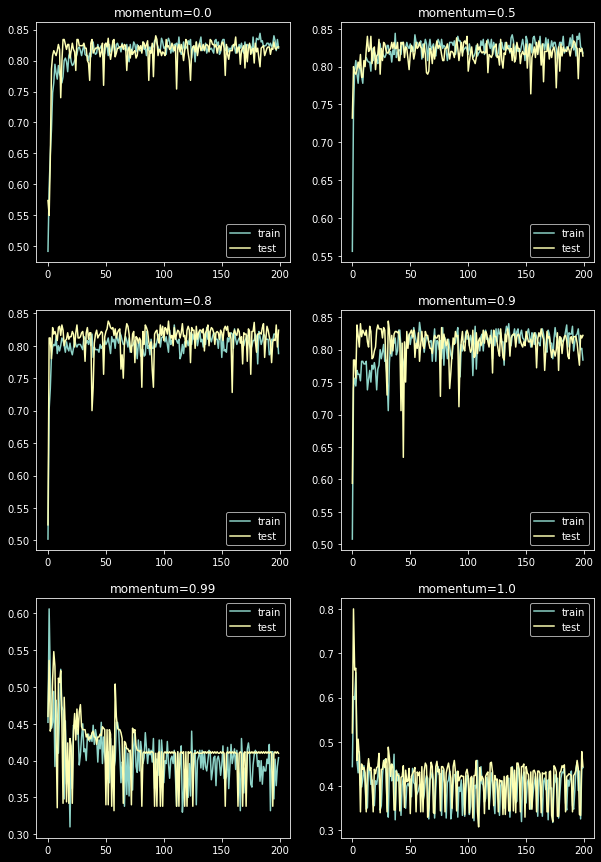

In [18]:
plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model_with_momentum(trainX, trainy, validX, validy, momentums[i])

# show learning curves
plt.show()

## Apply Learning Rate Decay (lr=0.01)

In [19]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))

In [20]:
# create learning curves for different decay
global_decays = [1E-1, 1E-2, 1E-3, 1E-4]
local_decays = [1E-2, 3E-2, 5E-2, 7E-2, 9E-2, 1E-1]

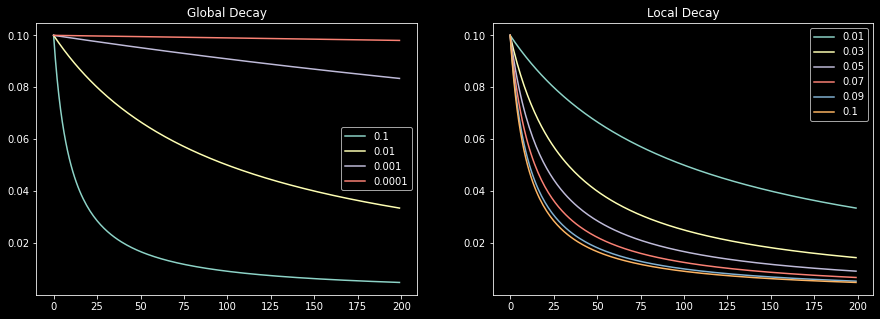

In [21]:
lrate = 0.1
n_updates = 200

plt.figure(figsize=(15, 5))

# set number plot
plt.subplot(121)
    
for decay in global_decays:
    
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    
    # plot result
    plt.plot(lrates, label=str(decay))
    plt.title('Global Decay')
    plt.legend()
    
# set number plot
plt.subplot(122)

for decay in local_decays:
    
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    
    # plot result
    plt.plot(lrates, label=str(decay))
    plt.title('Local Decay')
    plt.legend()
    
plt.show()

In [22]:
# fit a model and plot learning curve
def fit_model_with_decay(trainX, trainy, validX, validy, decay):
    
    # define model
    model = tf.keras.Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = tf.keras.optimizers.SGD(learning_rate=0.1, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('decay='+str(decay))
    plt.legend()

In [23]:
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]

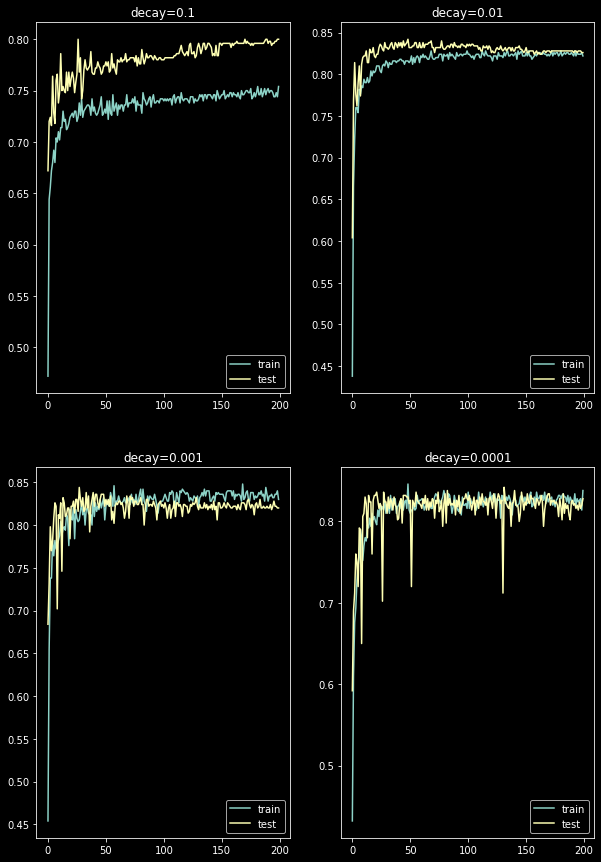

In [24]:
plt.figure(figsize=(10, 15))
for i in range(len(decay_rates)):

    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a decay rate
    fit_model_with_decay(trainX, trainy, validX, validy, decay_rates[i])

# show learning curves
plt.show()

---